In [45]:
#데이터를 잘 다루기 위해서는 데이터를 한 번 더 가공해야함.
#그전에 필요한 것들좀 임포트좀 시킬게용

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv('pima-indians-diabetes.csv',names = ["pregnant","plasma","pressure","thickness","insulin","BMI","pedigree","age","class"])

데이터를 가공해보자


In [ ]:
print(df[['pregnant','class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant',ascending=True))

#세가지 함수가 사용되었는데
#groubby함수란 정보를 기준으로 하는 새로운 그룹을 만드는 함수이며
#as_index=false 는 [정보] 옆에 새로운 Index를 만든다.
#Sort_Values ascending=True는 오름차순 정렬

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


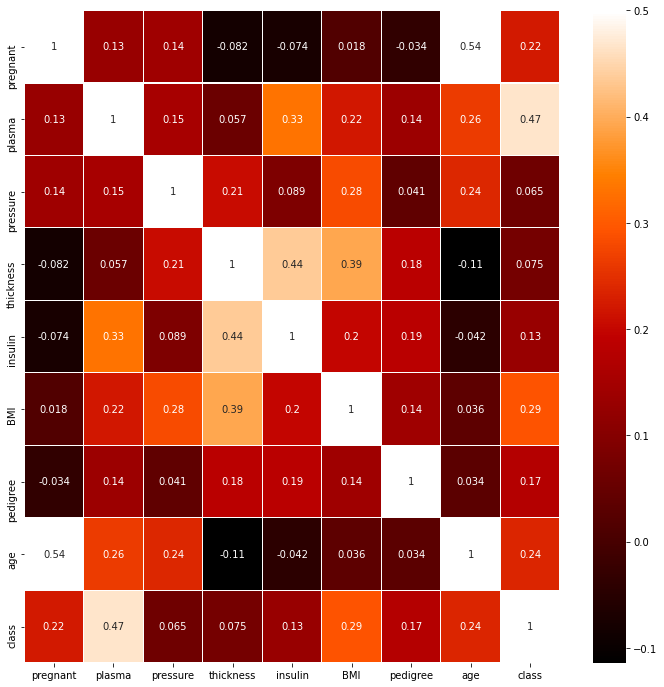

In [ ]:
plt.figure(figsize=(12,12)) # 그래프 크기를 결정해보자

sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5,cmap=plt.cm.gist_heat,linecolor='white',annot=True)
#그래프로 한번 봐볼까?
#seaborn 라이브러리에서 제공해주는 heatmap함수를 사용해보자!

#이는 각 정보끼리 어떠한 상관관계에 있는지를 보여준다.
#vmax,cmap 이런건 색상관련이니 넘어가고.
plt.show()

위의 그래프에서 무엇이 보였는가?

중요한 부분은 Class 항목을 봐야한다.
Class를 보면 pregnant부터 age까지 상관도가 숫자로 표현되있음을 알 수 있으며 숫자가 높을수록 밝은 색상인 것을 알 수 있다.

결론적으로 plasma(공복 혈당 농도)가 class 항목과 가장 상관관계가 높다는 것을
알게 되었다.

그렇다면 plasma와 class 항목만 따로 떼어 두 항목의 관계만 따지게 된다면
더 편하게 관계를 이해할 수 있을 것이다!

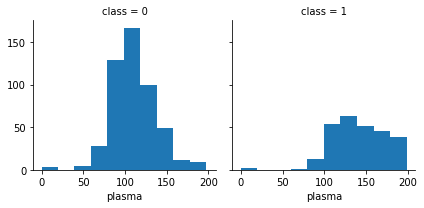

In [ ]:
#Let's check the relation between plasma and class

grid = sns.FacetGrid(df,col='class')
grid.map(plt.hist,'plasma',bins=10)
plt.show()

class = 0은 당뇨병 환자가 아닌것이며
class = 1은 당뇨병 환자인데

plasma 항목의 수치가 150 이상인 경우가 많다는 것을 알 수 있다.

즉 이렇게 결과에 미치는 영향이 큰 항목을 발견하는 것이

'데이터 전처리 과정'의 한 예시이다.

In [24]:
#다중 분류 문제

df = pd.read_csv('iris.csv',names = ["sepal_length","sepal_width","petal_length","petal_width","species"])

In [26]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


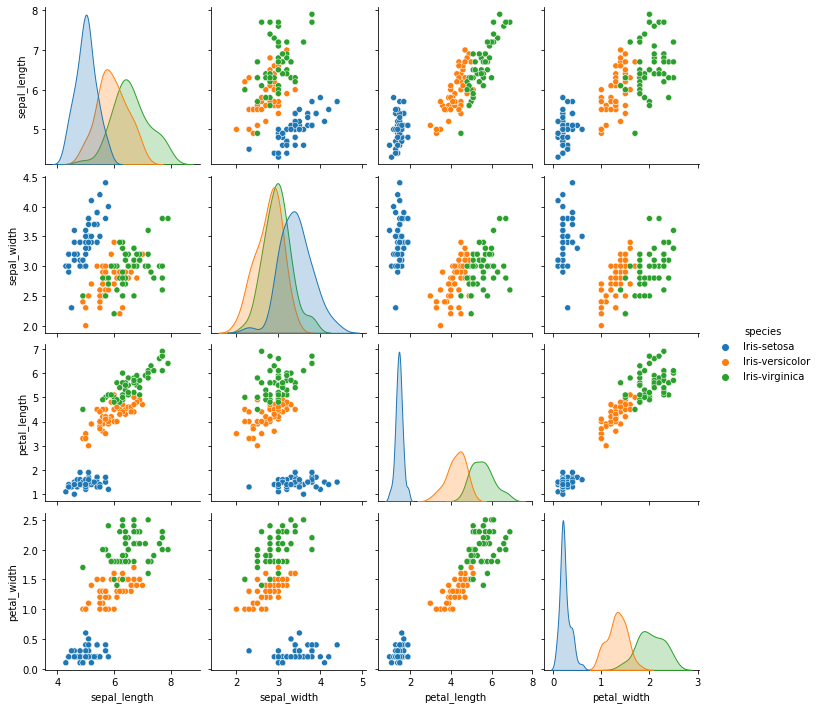

In [28]:
sns.pairplot(df,hue='species'); #seaborn 라이브러리에서 제공해주는 pairplot 함수를 이용해 서로의 상관관계를 확인해보자
plt.show()

In [34]:
x_data = df.iloc[:,:4]
y_data = df.iloc[:,4]
#데이터 스케일링

In [33]:
x_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
y_data

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [37]:
e = LabelEncoder()
e.fit(y_data)
Y_fit = e.transform(y_data)
Y_fit

#문자열 -> 숫자로 바꿔주자

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
y_encoded = to_categorical(Y_fit)
y_encoded
#원 핫 인코딩

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [46]:
model = Sequential()
model.add(Dense(16,input_dim=4,activation='relu')) # 입력 4 
model.add(Dense(8,activation='relu')) # 은닉층
model.add(Dense(3,activation='softmax')) # 출력층 

In [47]:
optim = optimizers.Adam(lr=0.005)
model.compile(optimizer=optim,loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
model.fit(x_data,y_encoded,epochs=50,batch_size=1)

Epoch 1/50
150/150 [==============================] - 1s 979us/step - loss: 1.1261 - accuracy: 0.2916
Epoch 2/50
150/150 [==============================] - 0s 971us/step - loss: 0.5641 - accuracy: 0.7267
Epoch 3/50
150/150 [==============================] - 0s 922us/step - loss: 0.3266 - accuracy: 0.9119
Epoch 4/50
150/150 [==============================] - 0s 948us/step - loss: 0.2199 - accuracy: 0.9254
Epoch 5/50
150/150 [==============================] - 0s 990us/step - loss: 0.1364 - accuracy: 0.9771
Epoch 6/50
150/150 [==============================] - 0s 929us/step - loss: 0.1185 - accuracy: 0.9803
Epoch 7/50
150/150 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.9701
Epoch 8/50
150/150 [==============================] - 0s 961us/step - loss: 0.1547 - accuracy: 0.9496
Epoch 9/50
150/150 [==============================] - 0s 1ms/step - loss: 0.2038 - accuracy: 0.8914
Epoch 10/50
150/150 [==============================] - 0s 958us/step - loss: 0.1447 - 

In [50]:
print("Acc : %.4f"%(model.evaluate(x_data,y_encoded)[1]))#모델평기

5/5 [==============================] - 0s 3ms/step - loss: 0.0796 - accuracy: 0.9667
Acc : 0.9667
